# Notebook for cellpy batch processing


_You can fill inn the MarkDown cells (the cells without "numbering") by double-clicking them. Also remember, press `shift + enter` to execute a cell._

A couple of useful links:

- [How to write MarkDown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#hr)
- [Jupyter notebooks](https://jupyter.org/)
- [cellpy](https://cellpy.readthedocs.io/en/latest/)


### This notebook uses the following packages

- python >= 3.10 < 3.12
- cellpy >= 1.0.1
- pandas
- numpy
- matplotlib
- plotly


# 0. Setting up things properly


## 0.1 Installing cellpy

For this to work, you will have to have a version of `cellpy` satisfying the criteria in the paragraph above. Use for example `conda` to create and environment and install `cellpy`:

````terminal
conda create -n cellpy
conda activate cellpy
conda install -c conda-forge cellpy
```ode in the github repository or
````


## 0.2 Make sure you have a properly working config file

For `cellpy` to find stuff, it needs to know where to look. A config file exists for this purpose. It is typically located in your home directory (for mac and linux) or in your user directory (for Windows, e.g. `C:\Users\username`) and has a name on this form (replacing "username" with your real username):

```
.cellpy_prms_username.conf
```

You can get help from the `cellpy` cli-tool for making one for you:

```terminal
cellpy setup
```

The file format is YAML (be aware that it cares about white spaces). The most important settings for this notebook are probably the `Paths`. Make sure they make sense (and that both the paths and the db_path filename exist) and edit it if necessary.

Here is how a typical file (at least the top of it) looks like:

```yaml
Paths:
  outdatadir: cellpy_data/out
  rawdatadir: cellpy_data/raw
  cellpydatadir: cellpy_data/cellpyfiles
  db_path: cellpy_data/db
  filelogdir: cellpy_data/logs
  examplesdir: cellpy_data/examples
  notebookdir: cellpy_data/notebooks
  templatedir: cellpy_data/templates
  batchfiledir: cellpy_data/batchfiles
  instrumentdir: cellpy_data/instruments
  db_filename: cellpy_db.xlsx
  env_file: .env_cellpy
FileNames:
  file_name_format: YYYYMMDD_[NAME]EEE_CC_TT_RR
  raw_extension: res
  reg_exp:
  sub_folders: true
  ...
```


## 0.3 Database file

This notebook uses the `cellpy` `batch` utility. For it to work properly (or at all) you will have to provide it with a database. You can choose to implement a database and a loader your self. Currently, `cellpy` ships with a very simple database solution that hardly justifies its name as a database. It reads an excel-file where the first row acts as column headers, the second provides the type (_e.g._ string, bool, etc), and the rest provides the necessary information for each of the cells (one row pr. cell).

A sample excel file ("db-file") is provided with this example. You will need fill inn values manually, one row for each cell you want to load. Then you will have to put it in the database folder (as defined in your config file where it says `db_file:` in the `Paths`-section). The name of the file must also be the same as defined in the config-file (`db_filename:`, _i.e_ `cellpy_db.xlsx` in the example config file snippet above).

When `cellpy` reads the file, it uses the batch column (see below) to select which rows (_i.e._ cells) to load. For example, if the "b01" batch column is the one you tell `cellpy` to use and you provide it with the name "casandras_experiment", it will only select the rows that has "casandras_experiment" in the "b01" column. You provide `cellpy` with the "lookup" name when you issue the `batch.init` command, for example:

```python
b = batch.init("paper01", "cool_project", batch_col="b01")
```

You must always have the columns colored green filled out. And make sure that the `id` column (the first one in the example xlsx file) has a unique integer for each row (it is used as a "key" when looking up stuff from the file).


## 0.4 Files to read

Make sure that the names of your experiment-files (for example your .res files) are on the form `date_something_that_describes_the_cell.res` because this is the name-format supported at the moment (this is not strictly true, but just to be on the safe side...).

OK, thats all for now. Have a look at the source code in the github repository or the documentation for more info.


# 1. Key information about the current experiment

**Experimental-id:** xxx  
**Short-name:** xxx  
**Project:** project name  
**By:** your name  
**Date:** xx.xx.xxxx


# 2. Short summary of the experiment before processing

It is often helpful to formulate what you wanted to achieve with your experiment before actually going into depth of the data. I believe that it does not make you "biased" when processing your data, but instead sharpens your mind and motivates you to look more closely on your results. I might be wrong, off course. Then just skip filling in this part.

### Main purpose

(_State the main hypothesis for the current set of experiment_)

### Expected outcome

(_What do you expect to find out? What kind of tests did you perform?_)

### Special considerations

(_State if there are any special considerations for this experiment_)


# 3. Processing data


### Setting up everything


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from rich import print

import cellpy
from cellpy import prms
from cellpy import prmreader
from cellpy.utils import batch, collectors

%matplotlib inline

In [2]:
# Comment out this when running the notebook locally:
import plotly.io as pio

pio.renderers.default = "png"

In [3]:
# # Uncomment this and run for checking your cellpy parameters.
# prmreader.info()

In [4]:
# Overriding some of the configuration parameters
prms.Paths.db_path = "."
prms.Paths.db_filename = "cellpy_db.xlsx"
prms.Paths.rawdatadir = "data/raw"
prms.Paths.cellpydatadir = "data/cellpyfiles"
prms.Paths.filelogdir = "out"
prms.Paths.notebookdir = "out"
prms.Paths.batchfiledir = "out"
prms.Paths.outdatadir = "out"

### Creating pages and initialise the cellpy batch object

If you need to create Journal Pages, please provide appropriate names for the project and the experiment to allow `cellpy` to build the pages.


In [5]:
# Please fill in here
project = "cool_project"
name = "paper01"
batch_col = "b01"

#### Initialisation


In [6]:
print(" INITIALISATION OF BATCH ".center(80, "="))
b = batch.init(name, project, batch_col=batch_col)

=========================== INITIALISATION OF BATCH ============================

#### Set parameters


In [7]:
# setting some prms
b.experiment.export_raw = False
b.experiment.export_cycles = False
b.experiment.export_ica = False

#### Run


In [8]:
# load info from your db and write the journal pages
b.create_journal()

In [9]:
# create the apropriate folders
b.paginate()

In [10]:
# let's have a look at what we got (you can also make this dataframe yourself without loading from the .xlsx file)
b.pages

,argument,mass,total_mass,loading,nom_cap,area,experiment,fixed,label,cell_type,instrument,raw_file_names,cellpy_file_name,comment,group,sub_group
filename,,,,,,,,,,,,,,,,
20180418_sf033_2_cc,None,0.337149,0.56,0.190787,3118.817466,1.767146,cycling,0,sf033_2,anode,arbin_res,[data/raw\20180418_sf033_2_cc_01.res],data/cellpyfiles/20180418_sf033_2_cc.h5,SF12 Filter D micro-slurry,1,1
20180418_sf033_3_cc,None,0.343169,0.57,0.194194,3118.817466,1.767146,cycling,0,sf033_3,anode,arbin_res,[data/raw\20180418_sf033_3_cc_01.res],data/cellpyfiles/20180418_sf033_3_cc.h5,SF12 Filter D micro-slurry,1,2
20180418_sf033_4_cc,None,0.288984,0.48,0.163532,3118.817466,1.767146,cycling,0,sf033_4,anode,arbin_res,[data/raw\20180418_sf033_4_cc_01.res],data/cellpyfiles/20180418_sf033_4_cc.h5,SF12 Filter D micro-slurry,1,3
20180418_sf033_5_cc,None,0.295005,0.49,0.166939,3118.817466,1.767146,cycling,0,sf033_5,anode,arbin_res,[data/raw\20180418_sf033_5_cc_01.res],data/cellpyfiles/20180418_sf033_5_cc.h5,SF12 Filter D micro-slurry,1,4
20180420_sf036_2_cc,None,0.572383,0.95,0.323902,3122.348698,1.767146,cycling,0,sf036_2,anode,arbin_res,[data/raw\20180420_sf036_2_cc_01.res],data/cellpyfiles/20180420_sf036_2_cc.h5,SF12 Filter 1 micro-slurry,2,1
20180420_sf036_3_cc,None,0.716985,1.19,0.405730,3122.348698,1.767146,cycling,0,sf036_3,anode,arbin_res,[data/raw\20180420_sf036_3_cc_01.res],data/cellpyfiles/20180420_sf036_3_cc.h5,SF12 Filter 1 micro-slurry,2,2
20180420_sf036_4_cc,None,0.584433,0.97,0.330721,3122.348698,1.767146,cycling,0,sf036_4,anode,arbin_res,[data/raw\20180420_sf036_4_cc_01.res],data/cellpyfiles/20180420_sf036_4_cc.h5,SF12 Filter 1 micro-slurry,2,3


In [11]:
# load the data (and save .csv-files if you have set export_(raw/cycles/ica) = True)
# (this might take some time)
b.update()

  0%|          | 0/7 [00:00<?, ?it/s]

# 4. Looking at the data


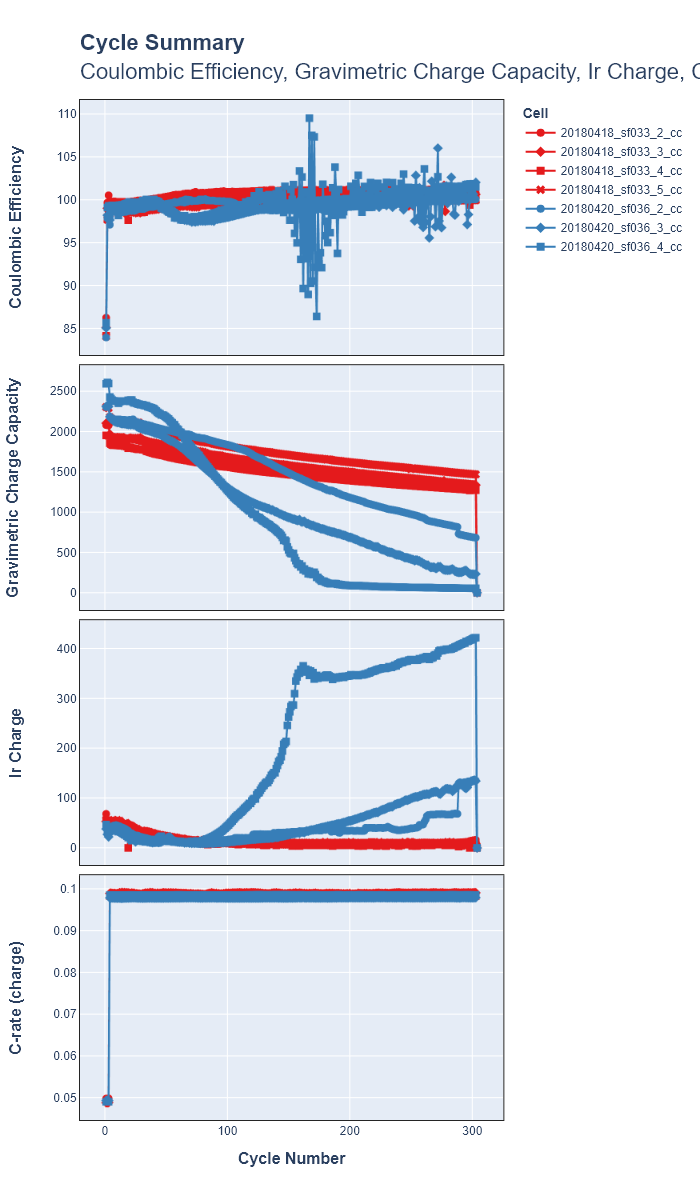

In [12]:
# Plot the charge capacity and the C.E. (and resistance) vs. cycle number (standard plot)
b.plot(rate=True)

In [13]:
b.report()

,mass,total_mass,loading,nom_cap,empty,raw_rows,steps_rows,summary_rows,last_cycle,average_capacity,max_capacity,min_capacity,std_capacity
filename,,,,,,,,,,,,,
20180418_sf033_2_cc,0.337149,0.560000,0.190787,3118.817466,False,160059,1578,304,304,1567.198001,2079.481739,0.000000,209.150717
20180418_sf033_3_cc,0.343169,0.570000,0.194194,3118.817466,False,160980,1587,304,304,1597.665927,2103.339517,0.000000,205.046181
20180418_sf033_4_cc,0.288984,0.480000,0.163532,3118.817466,False,155754,1567,304,304,1493.788287,1952.530597,0.000000,189.297846
20180418_sf033_5_cc,0.295005,0.490000,0.166939,3118.817466,False,169567,1588,304,304,1741.579324,2302.442797,0.000000,227.149486
20180420_sf036_2_cc,0.572383,0.950000,0.323902,3122.348698,False,157750,1586,304,304,1479.043916,2319.709751,0.000000,474.421220
20180420_sf036_3_cc,0.716985,1.190000,0.405730,3122.348698,False,134496,1571,304,304,1062.506245,2323.285459,0.000000,622.550951
20180420_sf036_4_cc,0.584433,0.970000,0.330721,3122.348698,False,128547,1561,304,304,880.014288,2608.773865,0.000000,889.235451


## Looking at collections


### Summaries


figure name: paper01_collected_summaries_discharge_capacity_gravimetric_average


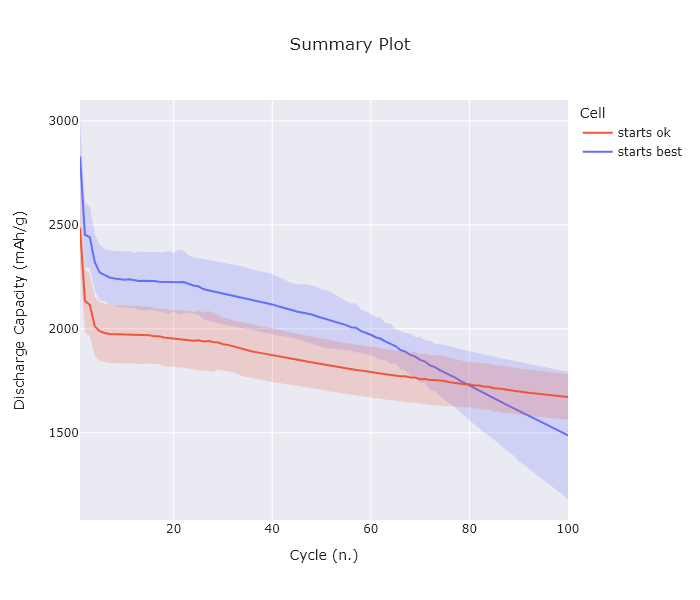

In [14]:
# collecting standard summaries:
group_labels = {1: "starts ok", 2: "starts best"}
discharge_cap_summaries_full = collectors.BatchSummaryCollector(
    b,
    columns=["discharge_capacity_gravimetric"],
    max_cycle=100,
    group_it=True,
    data_collector_arguments=dict(custom_group_labels=group_labels),
    spread=True,
    height=600,
)
discharge_cap_summaries_full.show()

In [15]:
# # saving for later:
# discharge_cap_summaries_full.save(serial_number=1)

In [16]:
discharge_capacity = b.summaries.discharge_capacity_gravimetric
charge_capacity = b.summaries.charge_capacity_gravimetric
coulombic_efficiency = b.summaries.coulombic_efficiency
ir_charge = b.summaries.ir_charge

Text(0, 0.5, 'resistance')

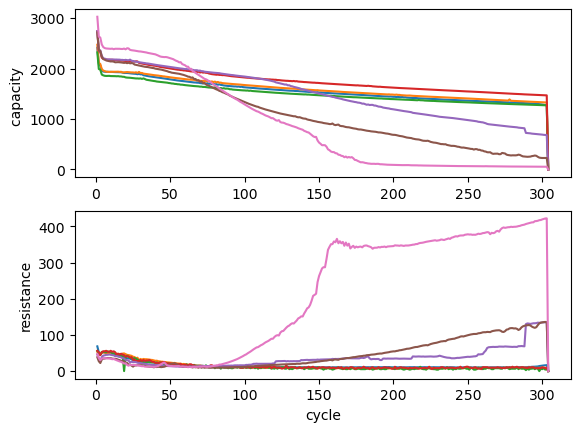

In [17]:
# Using matplotlib as provided by pandas this time
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(discharge_capacity)
ax1.set_ylabel("capacity ")
ax2.plot(ir_charge)
ax2.set_xlabel("cycle")
ax2.set_ylabel("resistance")

### Cycles


figure name: paper01_collected_cycles_intp_p100_bf_pr_cell


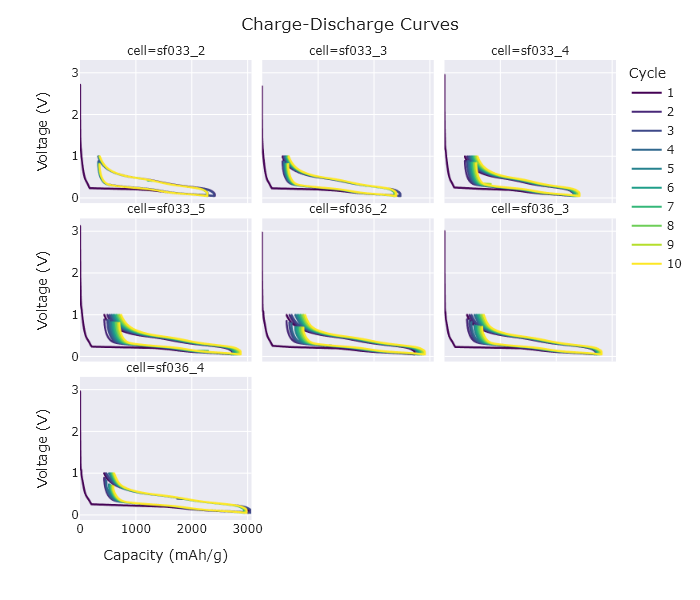

In [18]:
cells_collected = collectors.BatchCyclesCollector(b, max_cycle=10)
cells_collected.show()

In [19]:
cycles_collected = collectors.BatchCyclesCollector(
    b,
    cycles=[1, 2, 3, 10, 100, 200],
    collector_type="forth-and-forth",
    plot_type="fig_pr_cycle",
)

figure name: paper01_collected_cycles_intp_p100_ff_pr_cyc


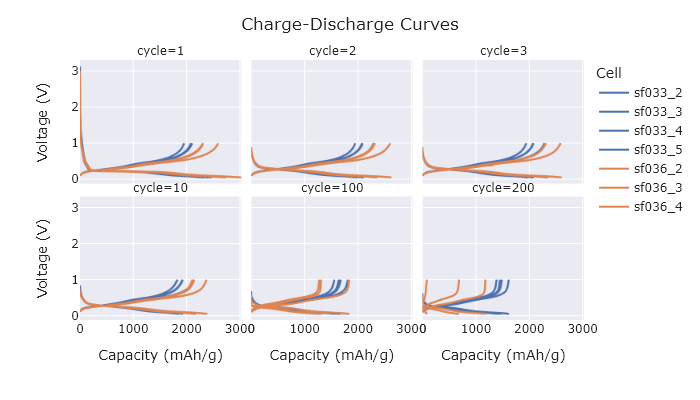

In [20]:
cycles_collected.show()

# 5. Checking for more details per cycle


#### A. pick the CellpyData object for one of the cells


In [21]:
# Lets check what cells we have
cell_labels = b.experiment.cell_names
print(cell_labels)

[
    '20180418_sf033_2_cc',
    '20180418_sf033_3_cc',
    '20180418_sf033_4_cc',
    '20180418_sf033_5_cc',
    '20180420_sf036_2_cc',
    '20180420_sf036_3_cc',
    '20180420_sf036_4_cc'
]

In [22]:
# OK, then I choose one of them
label = cell_labels[0]
c = b.experiment.data[label]

In [23]:
## view some info about the cell
# c

#### B. Get some voltage curves for some cycles and plot them

The method `get_cap` can be used to extract voltage curves.


In [24]:
cap = c.get_cap(categorical_column=True, method="forth-and-forth")
cap.head()

,voltage,capacity,direction
267,2.721604,0.000054,-1
268,2.708690,0.002016,-1
269,2.697006,0.003331,-1
270,2.686859,0.005308,-1
271,2.676098,0.007306,-1


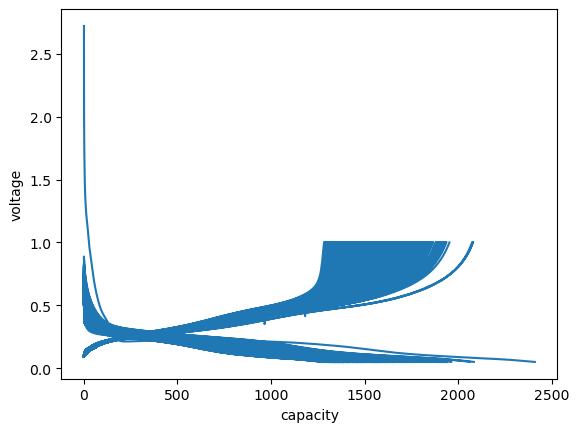

In [25]:
fig, ax = plt.subplots()
ax.plot(cap.capacity, cap.voltage)
ax.set_xlabel("capacity")
ax.set_ylabel("voltage")

#### C. Cleaning up the plot a bit


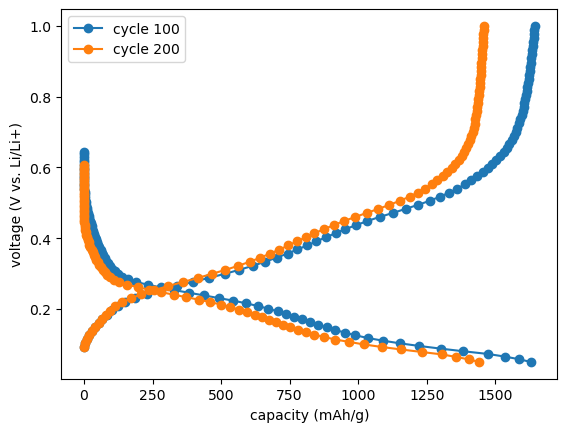

In [26]:
voltage_capacity_100 = c.get_cap(
    cycle=100, method="forth-and-forth", interpolated=True, number_of_points=80
)
voltage_capacity_200 = c.get_cap(
    cycle=200, method="forth-and-forth", interpolated=True, number_of_points=80
)

fig, ax = plt.subplots()
ax.set_xlabel(
    f"capacity ({c.cellpy_units.charge}/{c.cellpy_units.specific_gravimetric})"
)
ax.set_ylabel(f"voltage ({c.cellpy_units.voltage} vs. Li/Li+)")
ax.plot(
    voltage_capacity_100.capacity, voltage_capacity_100.voltage, "o-", label="cycle 100"
)
ax.plot(
    voltage_capacity_200.capacity, voltage_capacity_200.voltage, "o-", label="cycle 200"
)
ax.legend()